# Tarea 1

## Pregunta 1

**Assume we implemented an algorithm that has complexity approximately ${nlog(n)}$. How much faster is this implementation compared to one of complexity ${n^2}$?**

un algoritmo con complejidad ${nlog(n)}$ va a tener un crecimiento loglineal, mientras que el algortmo con complejidadad ${n^2}$ va a tener un crecimiento exponencial.


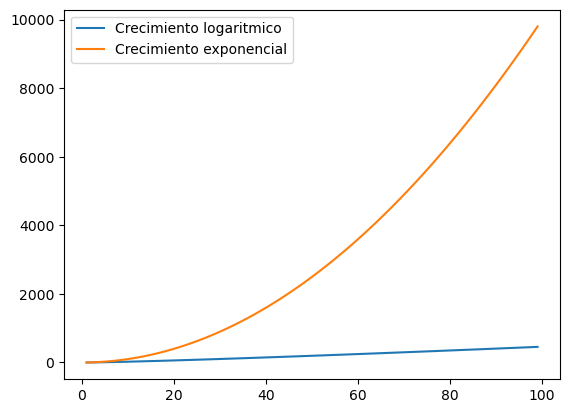

In [5]:
from matplotlib import pyplot
from math import log
def ecuacionLog(x):
    return x * log(x)

def ecuacionExp(x):
    return x**2


x = range(1,100)
pyplot.plot(x,[ecuacionLog(i) for i in x],label = "Crecimiento logaritmico")
pyplot.plot(x,[ecuacionExp(i) for i in x],label = "Crecimiento exponencial")
pyplot.legend()

Como se ve en la grafica, el crecimiento de la funcion ${nlog(n)}$ presenta un crecimiento que al trabajar con numeros muy grandes se puede comparar a la funcion de crecimiento n (que es ideal), mientras que la funcion de crecimiento exponencial (${n^2}$), con numeros muy altos, presenta un crecimiento mucho mayor

## Pregunta 2


The runtime of an algorithm is captured in the following table:
As precissely as possible, estimate the function that describes the growth of the runtime

Se grafica la tabla  a continuacion

<AxesSubplot:xlabel='N'>

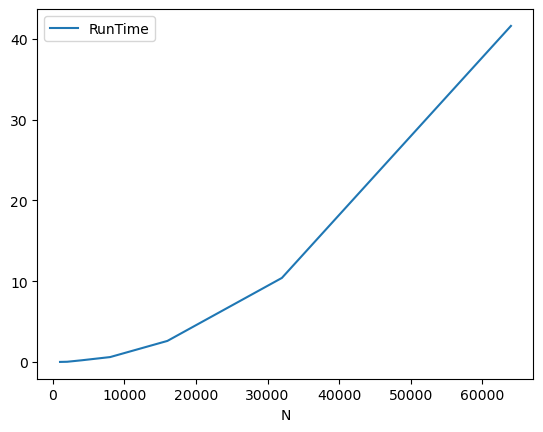

In [9]:
import pandas as pd
N = [1000, 2000,4000,8000,16000,32000,64000]
RunTime =  [0.0,0.02,0.2,0.6,2.6,10.4,41.6]

df = pd.DataFrame(zip(N,RunTime))
df.columns = ['N' , 'RunTime']
df.plot(x='N', y='RunTime')


Al ver la grafica, se puede notar que es similar a la de una funcion cuadratica, por lo que se toma el dato como si fuera una parabola con vertice cero. 
Se usa la ecuacion $${y = a(x-h)^2 + k}$$ donde h y k seran cero (vertice). Se toman los valores de la tabla (32000,10.4) y se reemplaza $${10.4 = a (32000-0)^2+0 -> 10.4 = a(32000)^2 }$$ se despeja para encontrar a y se obtiene que $${a = 1.0156x10^-8}$$ se reemplaza el valor de a en la ecuacion y se obtiene la ecuacion: $${T(n) = 1.0156x10^-8(N)^2}$$

para comprobar se reemplaza N en la ecuacion

In [12]:
for i in N:
    print((1.0156*10**-8)*i*i)

0.010156
0.040624
0.162496
0.649984
2.599936
10.399744
41.598976


## Ejercicio 3

By estimating the number of operations as a function of n, estimate the complexity of the following function

In [2]:
def func1(n):            
    A = range(0,n)
    sum = 0
    i = 0
    for x in A[i:]:
        i += 1
        for j in range(i, len(A)):
            y = A[j]
            k = j
            while k < len(A):
                z = A[k]
                k = 2*k
                if x + y <= z:
                    sum += 1
    return sum

def func1(n):                           |  Cost  |   Times              
    A = range(0,n)                      |   C1   |     1
    sum = 0                             |   C2   |     1
    i = 0                               |   C3   |     1
    for x in A[i:]:                     |   C4   |     n
        i += 1                          |   C5   |     n
        for j in range(i, len(A)):      |   C6   |     n^2
            y = A[j]                    |   C7   |     n^2
            k = j                       |   C8   |     n^2
            while k < len(A):           |   C9   |     Sumatoria (j=0 a n) t
                z = A[k]                |   C10  |     Sumatoria (j=0 a n) t-1
                k = 2*k                 |   C11  |     Sumatoria (j=0 a n) t-1    
                if x + y <= z:          |   C12  |     Sumatoria (j=0 a n) t-1    
                    sum += 1            |   C13  |     Sumatoria (j=0 a n) t-1
    return sum                          |   C14  |     1

se tiene la ecuacion: $${T(n) = C1+C2+C3+C14+(C4+C5)n+(C6+C7+C8)n^2+C9sum_{j=0}^n (t_j) + (C10+C11+C12+C13)sum_{j=0}^n (t_j -1) }$$


### Mejor Caso
El mejor caso se da cuando n = 0. El primer lazo, al x tomar valores entre (0,0) no se ejecutaria con ningun valor, por lo que solo se tomaria el valor de c1,c2 y c3 dando:  $${T(n) = C1 + C2 + C3}$$ por lo que si ${n = 0}$ la complejidad no dependera de n.
### Peor caso
En el peor caso, n es un numero extremadamente alto, por lo que el lazo while se considera como un for al considerar la complejidad, por lo que  se tiene: $${T(n)= C1+C2+C3+C14+(C4+C5)n+(C6+C7+C8)n^2 + (C9+C10+C11+C12+C13)n^3}$$.

### RunTime
$${C1 + C2 + C3 <= T(n) <= C1+C2+C3+C14+(C4+C5)n+(C6+C7+C8)n^2 + (C9+C10+C11+C12+C13)n^3}$$ 
### Simplificar 
$${C1 + C2 + C3 <= T(n) <= (C9+C10+C11+C12+C13)n^3}$$ 
Al n^3 ser tan grande, se vuelve predominante

## Ejercicio 4

 From class, remember the code we use to get the sum of the first ${n}$ positive integers:
``` python
 def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```
Now consider a different function that does the same thing.
``` python
def sum2(n): 
    total = n*(n+1)//2
return total
```
1. Run the two functions and make sure that they return the same outputs. Use n = 5,8,103,527

In [4]:
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
def sum2(n): 
    total = n*(n+1)//2
    return total
valoresN = [5,8,103,527]
for n in valoresN:
    print("El valor se sum1 es: ", sum1(n))
    print("El valor se sum2 es: ", sum2(n))

El valor se sum1 es:  15
El valor se sum2 es:  15
El valor se sum1 es:  36
El valor se sum2 es:  36
El valor se sum1 es:  5356
El valor se sum2 es:  5356
El valor se sum1 es:  139128
El valor se sum2 es:  139128


2. Use Python time library to estimate the runtime for inputs of ${n = 1,10,10^2,10^3,10^4,10^5,10^6,10^7,10^8,10^9}$

In [ ]:
from time import time

def DecoratorRunTime(func):
    # funcion para mostrar el runtime de la funcion
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time ()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.20f}s')
        return result
    return wrap_func
@DecoratorRunTime
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
@DecoratorRunTime
def sum2(n): 
    total = n*(n+1)//2
    return total

valores_n_ej2 = [1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9]
for m in valores_n_ej2:
    print("El valor se sum1 para ",m," es:", sum1(m))
    print("El valor se sum2 para ",m," es:", sum2(m))

Function 'sum1' executed in 0.00000000000000000000s
El valor se sum1 para  1  es: 1
Function 'sum2' executed in 0.00000000000000000000s
El valor se sum2 para  1  es: 1
Function 'sum1' executed in 0.00000000000000000000s
El valor se sum1 para  10  es: 55
Function 'sum2' executed in 0.00000000000000000000s
El valor se sum2 para  10  es: 55
Function 'sum1' executed in 0.00000000000000000000s
El valor se sum1 para  100  es: 5050
Function 'sum2' executed in 0.00000000000000000000s
El valor se sum2 para  100  es: 5050
Function 'sum1' executed in 0.00000000000000000000s
El valor se sum1 para  1000  es: 500500
Function 'sum2' executed in 0.00000000000000000000s
El valor se sum2 para  1000  es: 500500
Function 'sum1' executed in 0.00000000000000000000s
El valor se sum1 para  10000  es: 50005000
Function 'sum2' executed in 0.00000000000000000000s
El valor se sum2 para  10000  es: 50005000
Function 'sum1' executed in 0.00362610816955566406s
El valor se sum1 para  100000  es: 5000050000
Function '